# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc


## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [121]:
df=pd.read_csv('/content/RTA_Dataset.csv')
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [122]:
df.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [123]:
df.dropna(inplace=True)
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,U-Turn,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury
12,17:45:00,Thursday,18-30,Male,Junior high school,Employee,1-2yr,Public (> 45 seats),Owner,2-5yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
13,17:45:00,Thursday,31-50,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,Above 10yr,...,Waiting to go,na,na,na,na,Other,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
14,17:45:00,Thursday,31-50,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,1-2yr,...,Going straight,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Serious Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12302,17:25:00,Friday,31-50,Male,Junior high school,Employee,5-10yr,Automobile,Owner,1-2yr,...,Other,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Moving Backward,Serious Injury
12303,12:48:00,Friday,31-50,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Female,Over 51,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [124]:
df.duplicated().sum()

0

In [125]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,2889.000000,2889.000000
mean,2.011076,1.529249
std,0.635308,0.993012
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [126]:
df.shape

(2889, 32)

In [127]:
df.dtypes

,0
Time,object
Day_of_week,object
Age_band_of_driver,object
Sex_of_driver,object
Educational_level,object
Vehicle_driver_relation,object
Driving_experience,object
Type_of_vehicle,object
Owner_of_vehicle,object
Service_year_of_vehicle,object


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2889 entries, 8 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         2889 non-null   object
 1   Day_of_week                  2889 non-null   object
 2   Age_band_of_driver           2889 non-null   object
 3   Sex_of_driver                2889 non-null   object
 4   Educational_level            2889 non-null   object
 5   Vehicle_driver_relation      2889 non-null   object
 6   Driving_experience           2889 non-null   object
 7   Type_of_vehicle              2889 non-null   object
 8   Owner_of_vehicle             2889 non-null   object
 9   Service_year_of_vehicle      2889 non-null   object
 10  Defect_of_vehicle            2889 non-null   object
 11  Area_accident_occured        2889 non-null   object
 12  Lanes_or_Medians             2889 non-null   object
 13  Road_allignment              2889 non

In [129]:
df['Time'] = pd.to_datetime(df['Time'])


<ipython-input-129-1bfd8981fe14>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [130]:
df.duplicated()

,0
8,False
9,False
12,False
13,False
14,False
19,False
21,False
25,False
27,False
34,False


In [131]:
df.groupby('Accident_severity').size()

,0
Accident_severity,
Fatal injury,31
Serious Injury,392
Slight Injury,2466


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

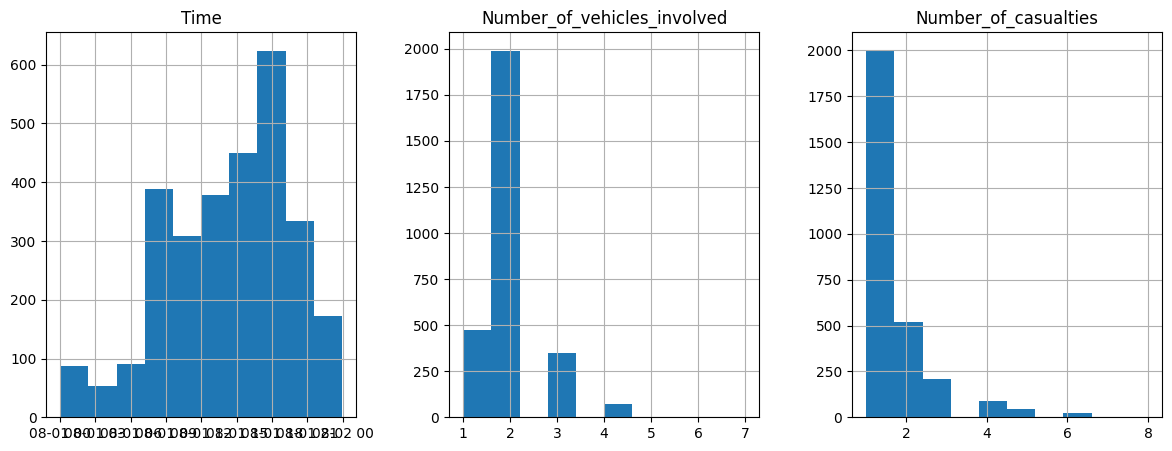

In [132]:
df.hist(layout=(1,6), figsize=(30,5))
plt.show()

In [133]:
df['Number_of_casualties'].value_counts()

,count
Number_of_casualties,
1,1999
2,521
3,208
4,87
5,47
6,22
8,3
7,2


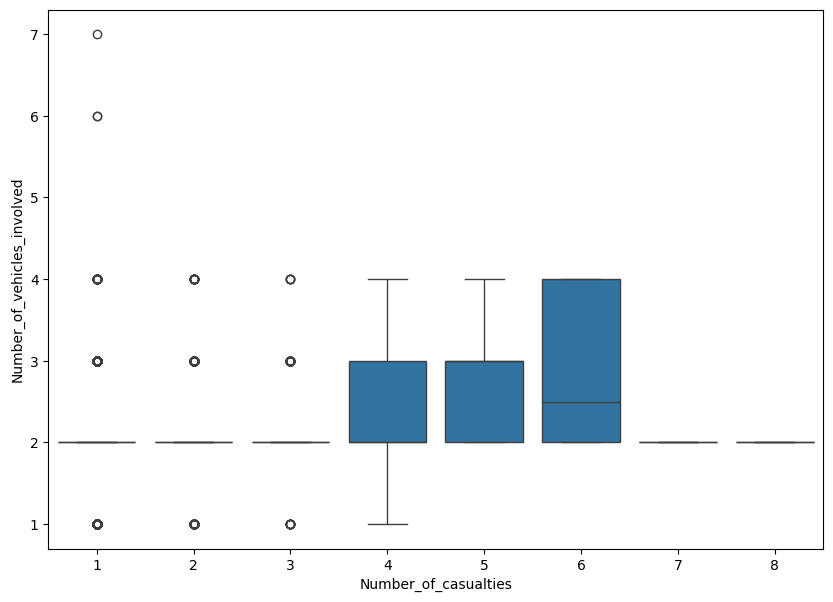

In [134]:
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, y='Number_of_vehicles_involved', x ='Number_of_casualties')
plt.show()

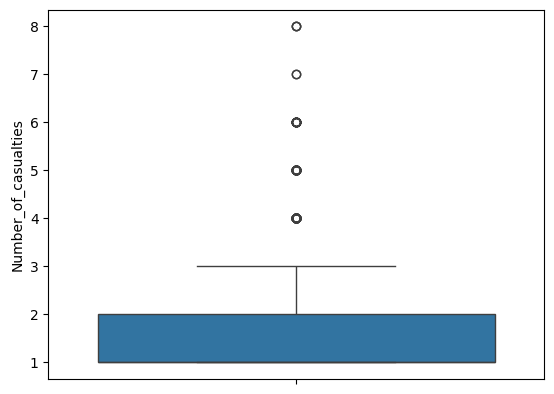

In [135]:
sns.boxplot(data=df, y='Number_of_casualties')
plt.show()

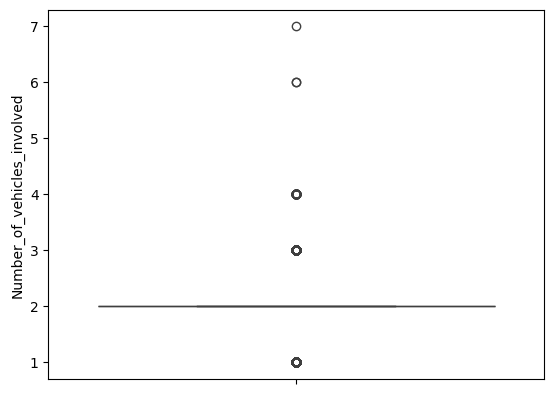

In [136]:
sns.boxplot(data=df, y='Number_of_vehicles_involved')
plt.show()

In [186]:
df['Number_of_vehicles_involved']

,Number_of_vehicles_involved
8,1
9,1
12,1
13,1
14,1
19,1
21,0
25,1
27,0
34,1


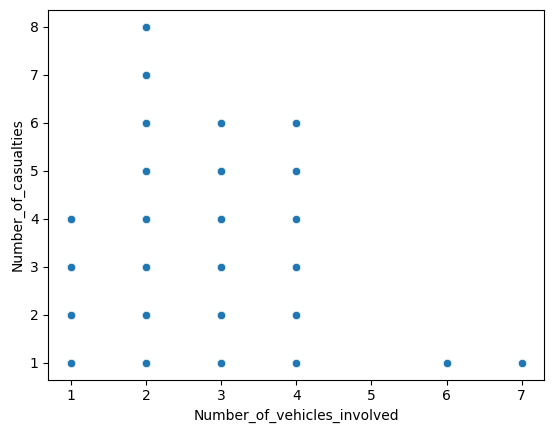

In [138]:
sns.scatterplot(x=df['Number_of_vehicles_involved'], y=df['Number_of_casualties'])
plt.show()

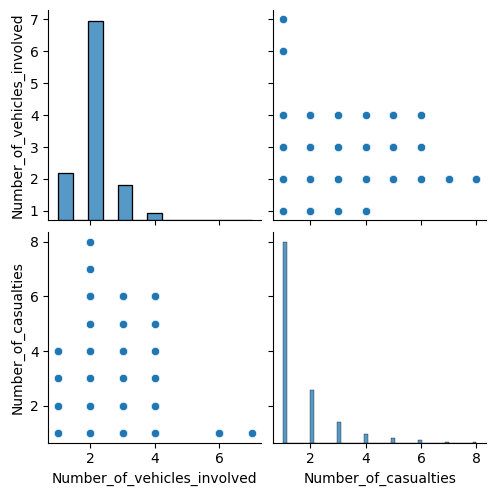

In [139]:
sns.pairplot(df[['Number_of_vehicles_involved','Number_of_casualties']])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/

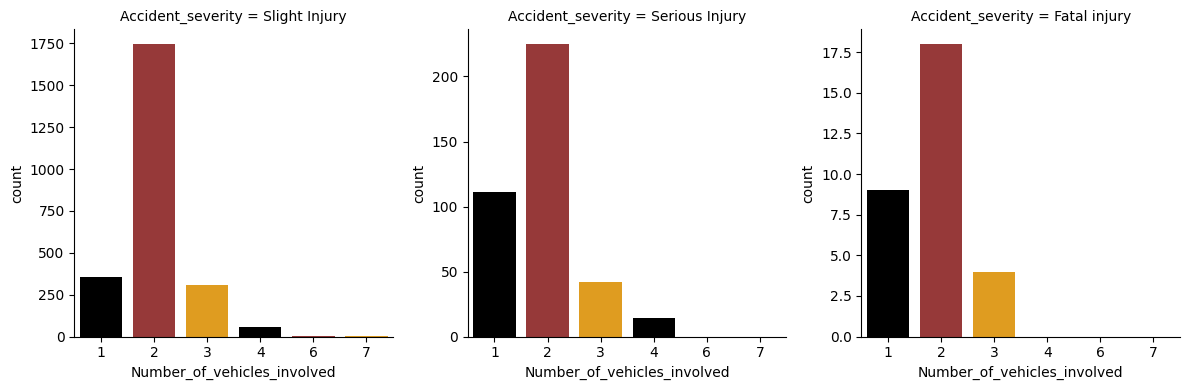

In [140]:
grid = sns.FacetGrid(data=df, col='Accident_severity', height=4, aspect=1, sharey=False)
grid.map(sns.countplot, 'Number_of_vehicles_involved', palette=['black', 'brown', 'orange'])
plt.show()

In [141]:
lists=['Vehicle_driver_relation', 'Work_of_casuality', 'Fitness_of_casuality','Day_of_week','Casualty_severity','Time','Sex_of_driver','Educational_level','Defect_of_vehicle','Owner_of_vehicle','Service_year_of_vehicle', 'Road_surface_type','Sex_of_casualty']
df.drop(columns = lists, inplace=True)

In [142]:
df.shape

(2889, 19)

In [143]:
df.columns

Index(['Age_band_of_driver', 'Driving_experience', 'Type_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Age_band_of_casualty',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

fill missing values with mean column values

In [144]:
df['Driving_experience'].fillna(df['Driving_experience'].mode()[0], inplace=True)
df['Age_band_of_driver'].fillna(df['Age_band_of_driver'].mode()[0], inplace=True)
df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0], inplace=True)
df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode()[0], inplace=True)
df['Road_allignment'].fillna(df['Road_allignment'].mode()[0], inplace=True)
df['Type_of_collision'].fillna(df['Type_of_collision'].mode()[0], inplace=True)
df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode()[0], inplace=True)
df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode()[0], inplace=True)
df['Types_of_Junction'].fillna(df['Types_of_Junction'].mode()[0], inplace=True)

In [145]:
df.isnull().sum()

,0
Age_band_of_driver,0
Driving_experience,0
Type_of_vehicle,0
Area_accident_occured,0
Lanes_or_Medians,0
Road_allignment,0
Types_of_Junction,0
Road_surface_conditions,0
Light_conditions,0
Weather_conditions,0


<ipython-input-146-2f489eec5aef>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Class 0:', target_count[0])
<ipython-input-146-2f489eec5aef>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Class 1:', target_count[1])
<ipython-input-146-2f489eec5aef>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')


Class 0: 2466
Class 1: 392
Proportion: 6.29 : 1


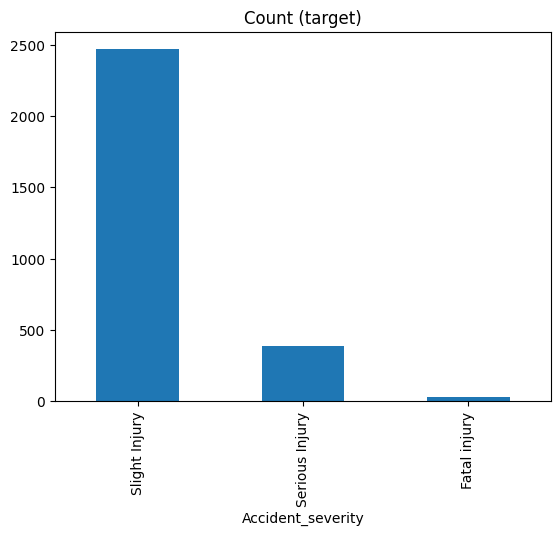

In [146]:
target_count = df['Accident_severity'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

**Data Visualization**
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

Heatmap of Correlation Matrix.
Line plots.
Scatter plots.
Histograms.
Boxplots.
Use more if needed!


In [147]:
from sklearn.preprocessing import LabelEncoder           #or one hot encoder
LE = LabelEncoder()
df=df.apply(LE.fit_transform)

<Axes: >

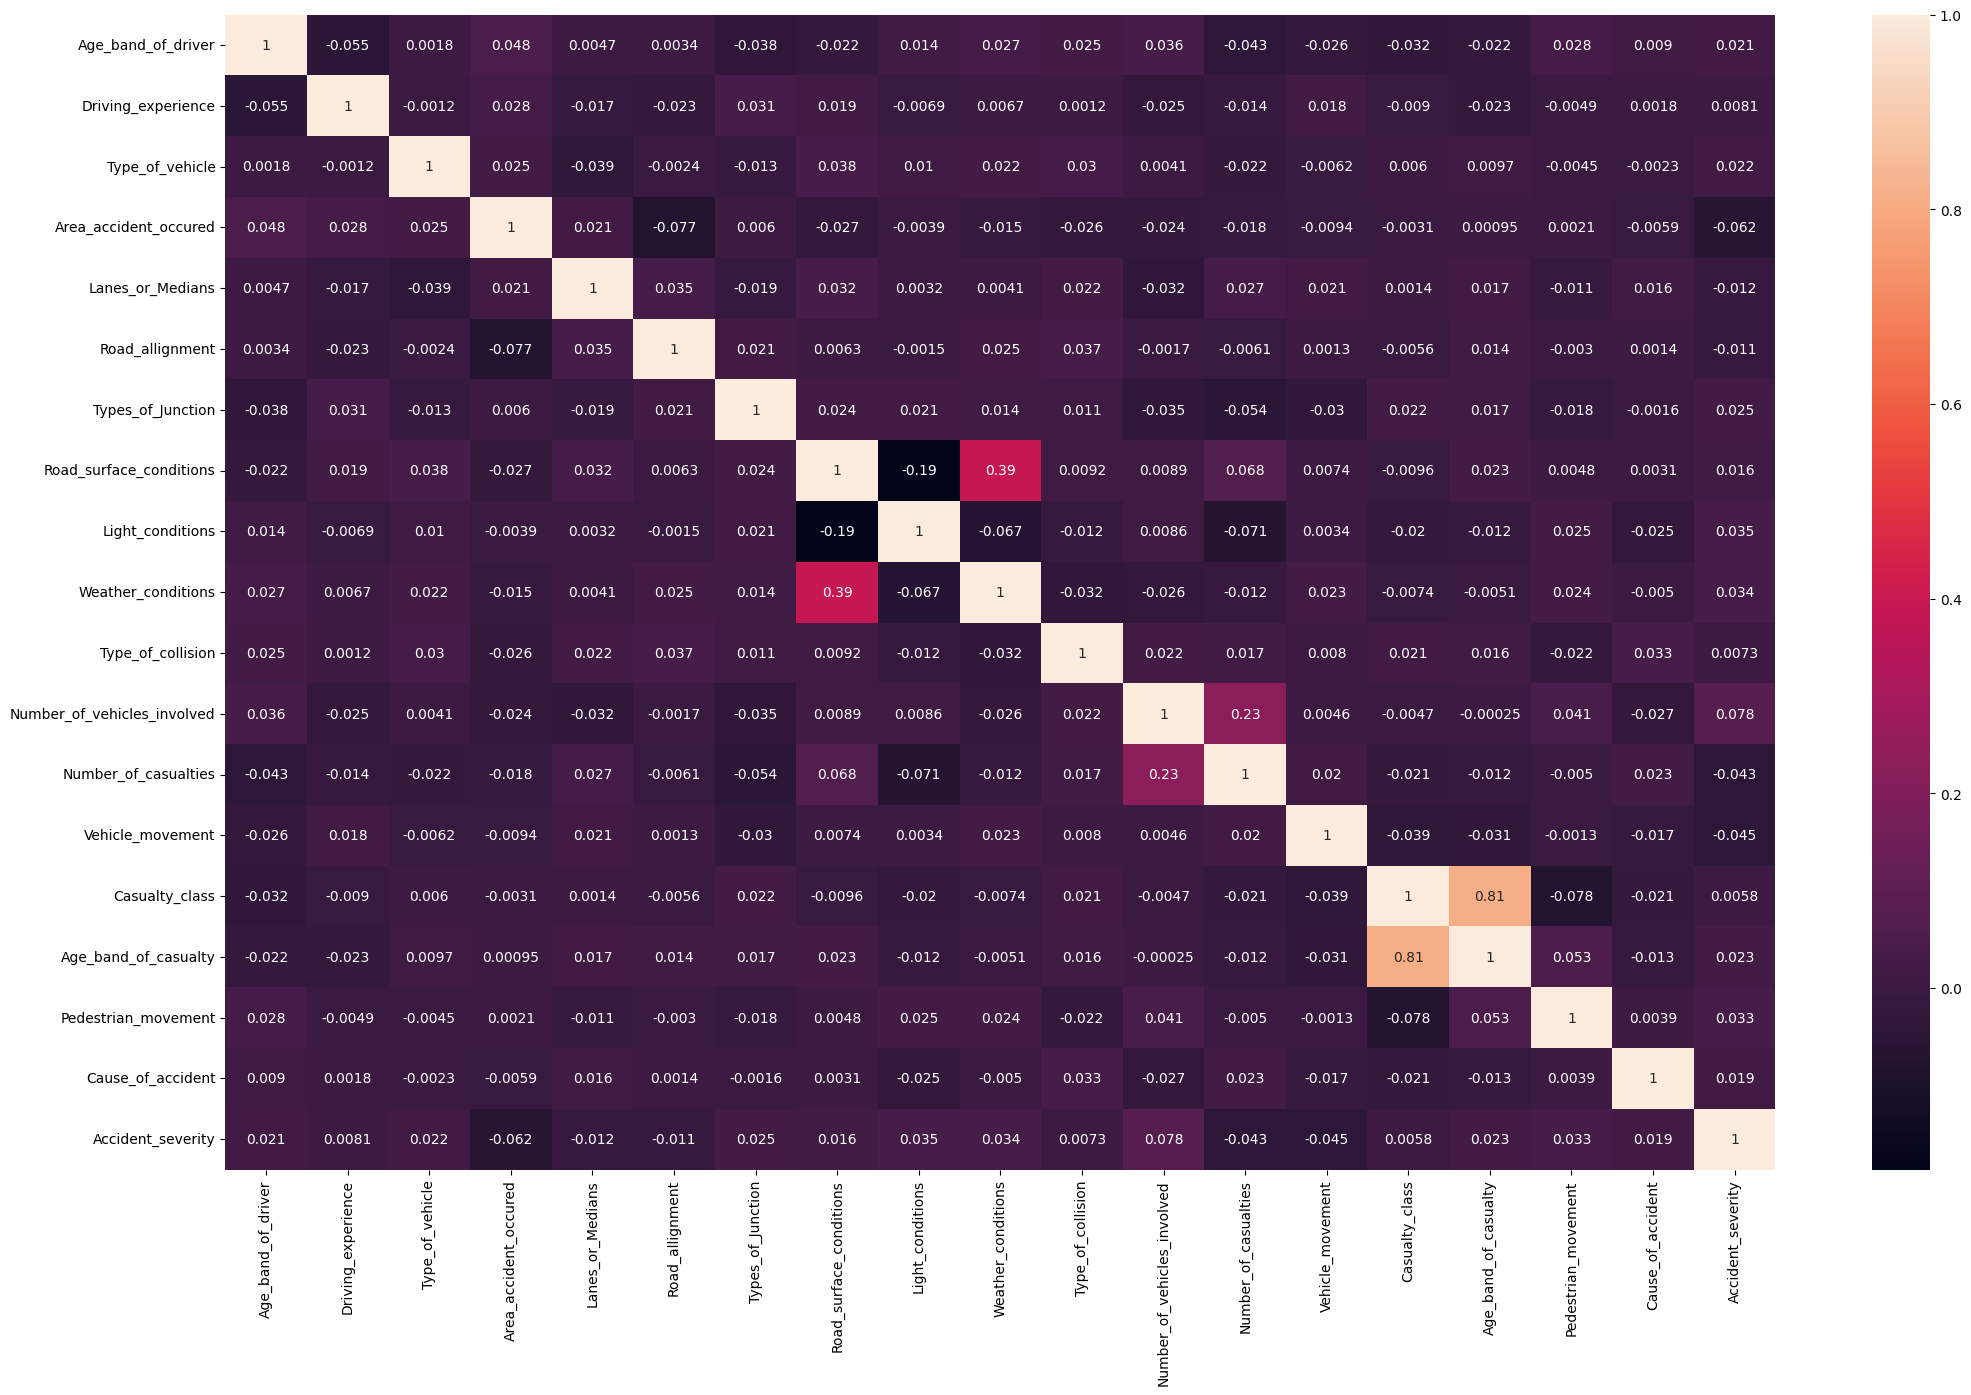

In [148]:
plt.figure(figsize=[25,15])
sns.heatmap(df.corr(),annot=True)

In [149]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <= 22:
        sns.countplot(y=col, data=df)
        plt.show()

In [150]:
x = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(2022, 18) (867, 18) (2022,) (867,)


In [151]:
from collections import Counter
from imblearn.over_sampling import SMOTE

counter = Counter(ytrain)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(ytrain)
print(f"Class= {k}, n={v} ({per:.2f}%)")

df_oversample = SMOTE()
xtrain, ytrain = df_oversample.fit_resample(xtrain, ytrain)

counter = Counter(ytrain)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(ytrain)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", xtrain.shape, ytrain.shape)


Class= 0, n=19 (0.94%)
Class= 2, n=1717 (33.33%)
Class= 1, n=1717 (33.33%)
Class= 0, n=1717 (33.33%)
Upsampled data shape:  (5151, 18) (5151,)


In [152]:
x=df.drop(columns=["Accident_severity"])
y=df["Accident_severity"]


## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [167]:
X = df.drop('Accident_severity', axis=1)  # Replace 'target_variable' with the name of your target variable column
y = df['Accident_severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

1. Logistic Regression

In [182]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



In [185]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

models={"LogisticRegression":LogisticRegression(),
        "DecisionTreeClassifier":DecisionTreeClassifier(),
        "SVM":SVC(),
        "KNeighborsClassifier":KNeighborsClassifier(),
        "GNB":GaussianNB(),
       "RandomForestClassifier":RandomForestClassifier(),
        "AdaBoostClassifier":AdaBoostClassifier(),
        "GradientBoostingClassifier":GradientBoostingClassifier(),
        }

Decision Tree Classifier


In [184]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

print("\nDecision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_dtree))


Decision Tree Metrics:
Accuracy: 0.7577854671280276


Support Vector Machine (SVM)

In [170]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("\nSVM Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Metrics:
Accuracy: 0.870242214532872


K-Neighbors Classifier

In [172]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("\nK-Neighbors Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))



K-Neighbors Metrics:
Accuracy: 0.856401384083045


In [171]:
from sklearn.pipeline import Pipeline # Import the Pipeline class
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

def modelAccuracy(models, x, y, scaleFlag):
    result={}
    for name,model in models.items():
        #1.Transformer -> 2.Model
        if(scaleFlag==1):
            model_pipeline=Pipeline([('MinMaxScler',MinMaxScaler()),('model',model)])
        elif(scaleFlag==2):
             model_pipeline=Pipeline([('StandardScaler',StandardScaler()),('model',model)])
        #Train-Test Split
        xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)
        #Model Training
        model_pipeline.fit(xtrain,ytrain)
        #Prediction
        ypred=model_pipeline.predict(xtest)
        #Accuracy
        result[name]=accuracy_score(ytest,ypred)
    return result

#### Decision Tree Classifier

In [155]:
def bestModel(result):
    high=0
    for name,acc in result.items():
        if acc>high:
            high=acc
            model_name=name
    print("Best Model is ",model_name," with accuaracy =>",high)

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

0.870242214532872
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00        67
           2       0.87      1.00      0.93       503

    accuracy                           0.87       578
   macro avg       0.29      0.33      0.31       578
weighted avg       0.76      0.87      0.81       578



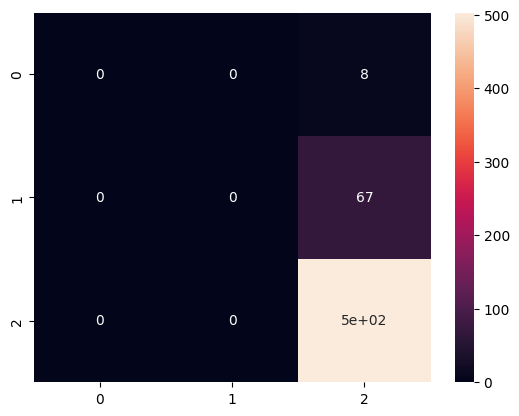

In [180]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split



result = modelAccuracy(models, x, y, scaleFlag=1)

chosen_model = list(result.keys())[0]
model = models[chosen_model]


xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)
model.fit(xtrain, ytrain)
y_pred = model.predict(xtest)


print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

### F1 Score

In [181]:
from sklearn.metrics import f1_score

# Assuming y_test and y_pred are defined for your model
f1 = f1_score(y_test, y_pred, average='weighted') # Use 'weighted' averaging for multiclass
print("F1-score:", f1)

F1-score: 0.8098646325810076


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

answer :  In my opinion and based on what I was able to extract from the results of my project, **Decision Tree Metrics** is the lowest error value.

It may be otherwise, but this is all I tried to conclude and work on, and the future is better, Inshaallah.
Thank you.